In [218]:
import zipfile, os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

In [219]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-11-07 08:23:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.207, 142.250.31.207, 142.251.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.6’

pizza_steak.zip.6   100%[===================>] 104.47M   338MB/s    in 0.3s    

2025-11-07 08:23:36 (338 MB/s) - ‘pizza_steak.zip.6’ saved [109540975/109540975]



In [220]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [221]:
!ls pizza_steak/

test  train


In [222]:
!ls pizza_steak/train

pizza  steak


In [223]:
#Another way to check for content
base_dir = "pizza_steak"
print (os.listdir(base_dir))

['test', 'train']


In [224]:
for dirpath,dirnames,filenames in os.walk(base_dir):
  print (f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [225]:
def view_random_image(target_dir, target_class):
  #get a list of all target class images
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(os.path.join(target_folder, random_image[0]))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


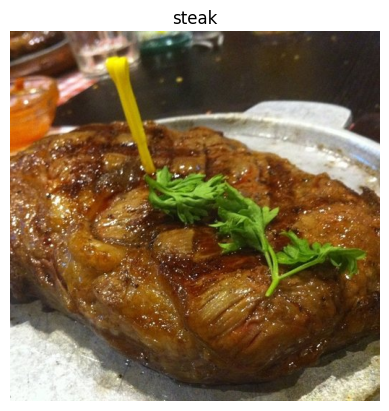

In [226]:
img=view_random_image(target_dir="pizza_steak/train/", target_class="steak")

Second Example

In [227]:
tf.random.set_seed(42)

In [228]:
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [229]:
train_data = train_data.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 1500 images belonging to 2 classes.


In [230]:
test_data = test_data.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 500 images belonging to 2 classes.


In [231]:
tf.random.set_seed(42)
model_one=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [232]:
model_one.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [233]:
history_one=model_one.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                      validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.4785 - loss: 0.9287 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.5119 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.5040 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.5131 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


In [234]:
loss,accuracy=model_one.evaluate(test_data)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5228 - loss: 0.6931
Test loss: 0.6931471824645996
Test accuracy: 0.5


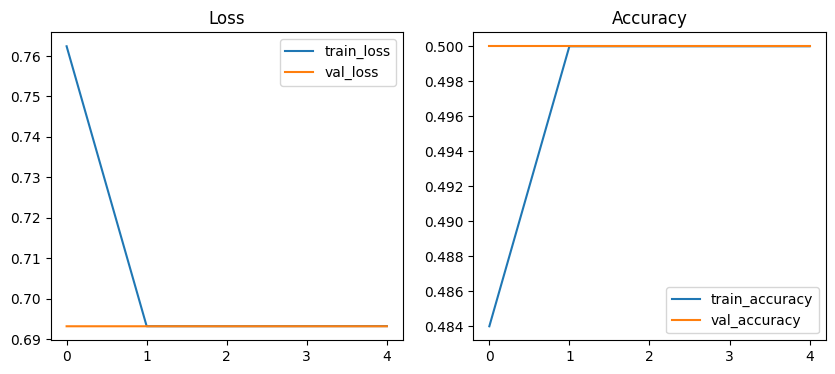

In [235]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_one.history["loss"],label="train_loss")
plt.plot(history_one.history["val_loss"],label="val_loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_one.history["accuracy"],label="train_accuracy")
plt.plot(history_one.history["val_accuracy"],label="val_accuracy")
plt.title("Accuracy")
plt.legend()

plt.show()

In [236]:
from tensorflow.keras.utils import load_img,img_to_array
img_sample=load_img("/content/sample_data/pizza_sam.jpg",target_size=(224,224))
img_sample=img_to_array(img_sample)
img_sample=img_sample/255.
prediction=model_one.predict(tf.expand_dims(img_sample,axis=0))
class_names=["pizza","steak"]
#print(f"Prediction: {class_name[int(tf.round(prediction[0][0]))]}")
predict_class=class_names[int(tf.round(prediction[0][0]))]
print("Image entered by you is likely a ",predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image entered by you is likely a  pizza


Write a function to take images from user and display with label wether its pizza or steak using model1_one

Saving how-to-cook-steak-in-the-oven-index-66a3eda7b9f52.jpg.avif to how-to-cook-steak-in-the-oven-index-66a3eda7b9f52.jpg (4).avif
File uploaded:  how-to-cook-steak-in-the-oven-index-66a3eda7b9f52.jpg (4).avif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction:  Pizza
Confidence:  50.021507 % 


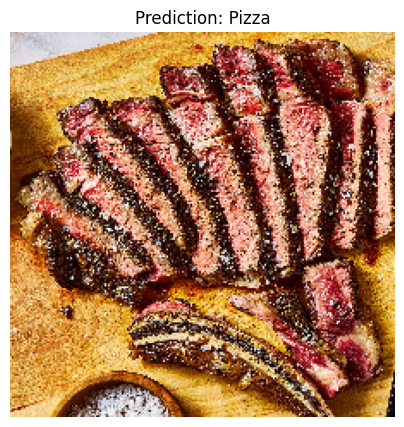

In [240]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img_path=fn
  print("File uploaded: ",img_path)
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)/255.0


  pred=model_one.predict(img_array)[0][0]
  label="Pizza" if pred<0.5 else "Steak"
  print("Prediction: ",label)
  print("Confidence: ",100*(1-pred) if pred<0.5 else 100*pred, "% ")

  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.title(f"Prediction: {label}")
  plt.axis('off')
  plt.show()